In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# store map size (pixels)
STORE_SIZE = [3136, 2475] 

TRANSFORMED_DATA_103_PATH = "results/trajectories/transformed_coords_1.03.csv"
TRANSFORMED_DATA_104_PATH = "results/trajectories/transformed_coords_1.04.csv"
TRANSFORMED_DATA_105_PATH = "results/trajectories/transformed_coords_1.05.csv"
#TRANSFORMED_DATA_205_PATH = "results/trajectories/transformed_coords_2.05.csv"
TRANSFORMED_DATA_SELECT_CAMS_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords_selected_cameras.csv"
MAP_PATH = "C:/Users/diogo/Desktop/Tese/Dados/floorplan.png"
COLOR_PER_CAMERA = {"1.03": "Greys", "1.04": "Greens", "1.05": "Oranges", "2.05": "Blues", "2.11": "RdPu"}

In [92]:
df_103 = pd.read_csv(TRANSFORMED_DATA_103_PATH)
df_104 = pd.read_csv(TRANSFORMED_DATA_104_PATH)
df_105 = pd.read_csv(TRANSFORMED_DATA_105_PATH)
df_103.head()

,Unnamed: 0.1,Unnamed: 0,video_name,frame_id,xmin,ymin,xmax,ymax,velocity,customer_id,x_floorplan,y_floorplan,camera,x_floorplan_new,y_floorplan_new,time
0,0,0,20220314_1.03_10_0_blurred,258,653.596516,233.180269,732.845525,330.121294,0.000,2383,-359.594824,-48.170086,1.03,1226.894568,1430.999265,14:47:33
1,1,1,20220314_1.03_10_0_blurred,260,653.706260,233.044283,732.741128,329.715728,0.105,2383,-359.589552,-48.161038,1.03,1227.066483,1431.227170,14:47:33
2,2,2,20220314_1.03_10_0_blurred,261,653.599622,233.117391,731.924925,328.843053,0.185,2383,-359.588172,-48.152324,1.03,1227.111485,1431.446655,14:47:33
3,3,3,20220314_1.03_10_0_blurred,264,653.864126,233.172724,732.331825,329.024946,0.128,2383,-359.587332,-48.155114,1.03,1227.138867,1431.376397,14:47:34
4,4,4,20220314_1.03_10_0_blurred,285,653.823460,232.950344,732.490189,329.088096,0.119,2383,-359.586592,-48.153137,1.03,1227.163013,1431.426174,14:47:37


In [93]:
def get_data_by_customer(df, customer_id):
    return df.loc[df["customer_id"] == customer_id]

def get_data_by_customer_and_camera(df, customer_id, camera):
    return df.loc[df["customer_id"] == customer_id].loc[df["camera"] == camera]

def get_data_by_time(df, begin_time, end_time):
    return df.loc[(df["time"] > begin_time) & (df["time"] < end_time)]

def count_different_customers(df):
    return df.customer_id.unique().size

def get_time_interval(df):
    min_time = df["time"].min()
    max_time = df["time"].max()
    return (min_time, max_time)

def get_color(camera, i, length):
    palette = sns.color_palette(COLOR_PER_CAMERA[camera], 3)
    if i < (length / 3):
        return palette[0]
    elif i < ((2*length) / 3):
        return palette[1]
    else:
        return palette[2]

def print_trajectory_chronologically(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    pd.to_datetime(df["time"], format="%H:%M:%S")
    df_chrono = df.sort_values(["time"])

    for camera in df_chrono["camera"].unique():
        camera_list = df_chrono.loc[df_chrono.camera == camera].values.tolist()
        for i in range(len(camera_list)):
            proj_color = get_color(str(camera), i, len(camera_list))
            print("video name: " + str(camera_list[i][2]) + "time: " + str(camera_list[i][15]) + " bbox coords: (" + str(camera_list[i][4]) + " " + str(camera_list[i][5]) + " " + str(camera_list[i][6]) + " " + 
                  str(camera_list[i][7]) + ") camera: " + str(camera_list[i][12]))
            plt.scatter(camera_list[i][13], camera_list[i][14], marker=".", s=1, lw=0, color=proj_color)
        
    plt.show()


def print_coordinate(x_coord, y_coord):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])
    plt.scatter(x_coord, y_coord, marker=".", s=1, lw=0, color="red")
    plt.show()


def print_trajectory_by_client(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    counter = 0
    color_palette = sns.color_palette("Paired", len(df["customer_id"].unique()))
    for customer in df["customer_id"].unique():
        plt.scatter(df.loc[df.Customer_id == customer, "x_floorplan_new"], df.loc[df.Customer_id == customer, "y_floorplan_new"], marker=".", s=1, lw=0, color=color_palette[counter])
        counter+=1
        
    plt.show()

### Main - 1.03


3
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (160.75442282890123 363.48679974567045 240.5130851240565 464.5173730349241) camera: 1.03
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (232.710211307706 338.4643293004518 311.90546118775444 437.3011442094935) camera: 1.03
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (653.2590614096206 231.88261321454985 732.4654379826696 330.0062340897153) camera: 1.03
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (157.15653075838387 359.08668581331807 237.7918732239544 461.47544619988014) camera: 1.03
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (237.24076448974543 342.35266080448207 308.6478916584029 433.1473190459917) camera: 1.03
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (151.64007460576676 354.67113963763643 234.68840880476043 461.0235549827084) camera: 1.03
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coor

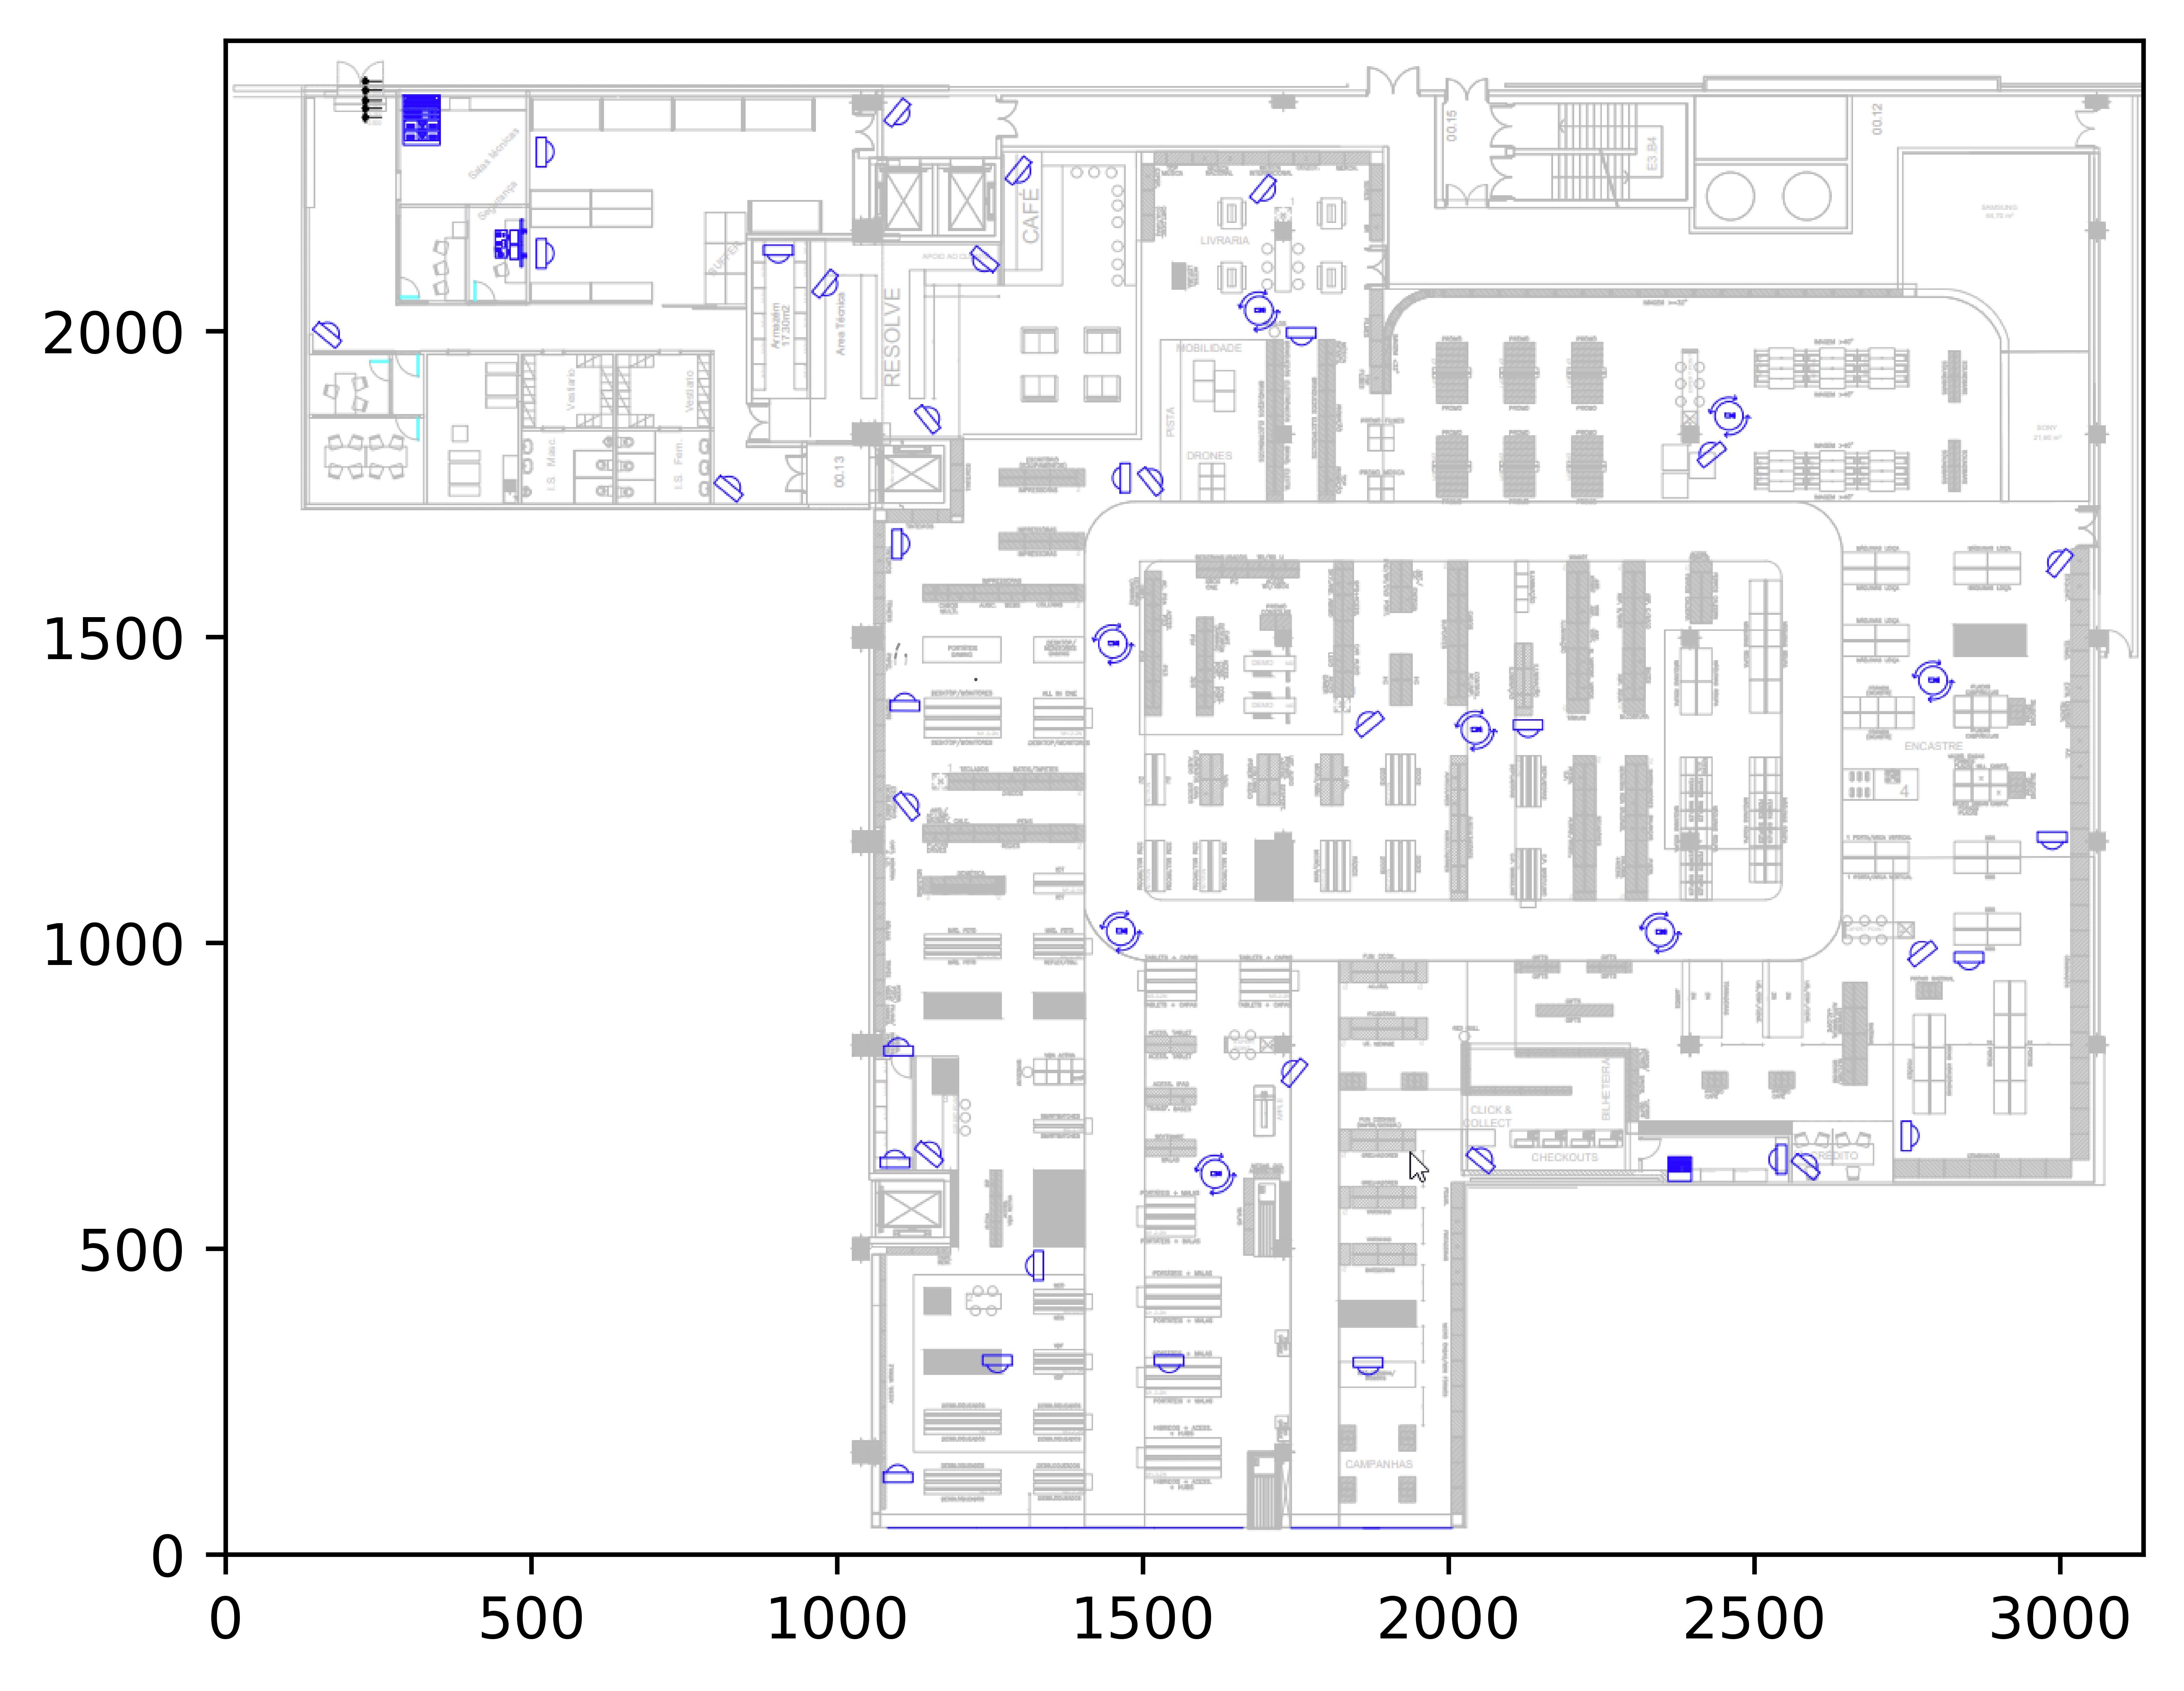

In [97]:
data_by_time = get_data_by_time(df_103, "16:30:30", "16:30:40")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

4
video name: 20220314_1.04_5_6_blurredtime: 16:30:29 bbox coords: (323.3384535159543 639.1561279296875 526.8097520504518 718.9515869140625) camera: 1.04
video name: 20220314_1.04_5_6_blurredtime: 16:30:29 bbox coords: (295.5264459044293 619.7869405828644 547.3517315854724 719.0199460747099) camera: 1.04
video name: 20220314_1.04_5_6_blurredtime: 16:30:30 bbox coords: (250.3360674139387 592.4896917923619 565.0622819408708 718.4506104946424) camera: 1.04
video name: 20220314_1.04_5_6_blurredtime: 16:30:30 bbox coords: (208.3351739266656 560.678481885116 593.171426448355 718.5494150407667) camera: 1.04
video name: 20220314_1.04_5_6_blurredtime: 16:30:30 bbox coords: (175.42221880020412 531.0828734887799 618.5727631721816 718.76882395058) camera: 1.04
video name: 20220314_1.04_5_6_blurredtime: 16:30:30 bbox coords: (148.96499922657188 504.3474309816039 636.7380890013751 718.8332267337062) camera: 1.04
video name: 20220314_1.04_5_6_blurredtime: 16:30:30 bbox coords: (130.68310029682095 483

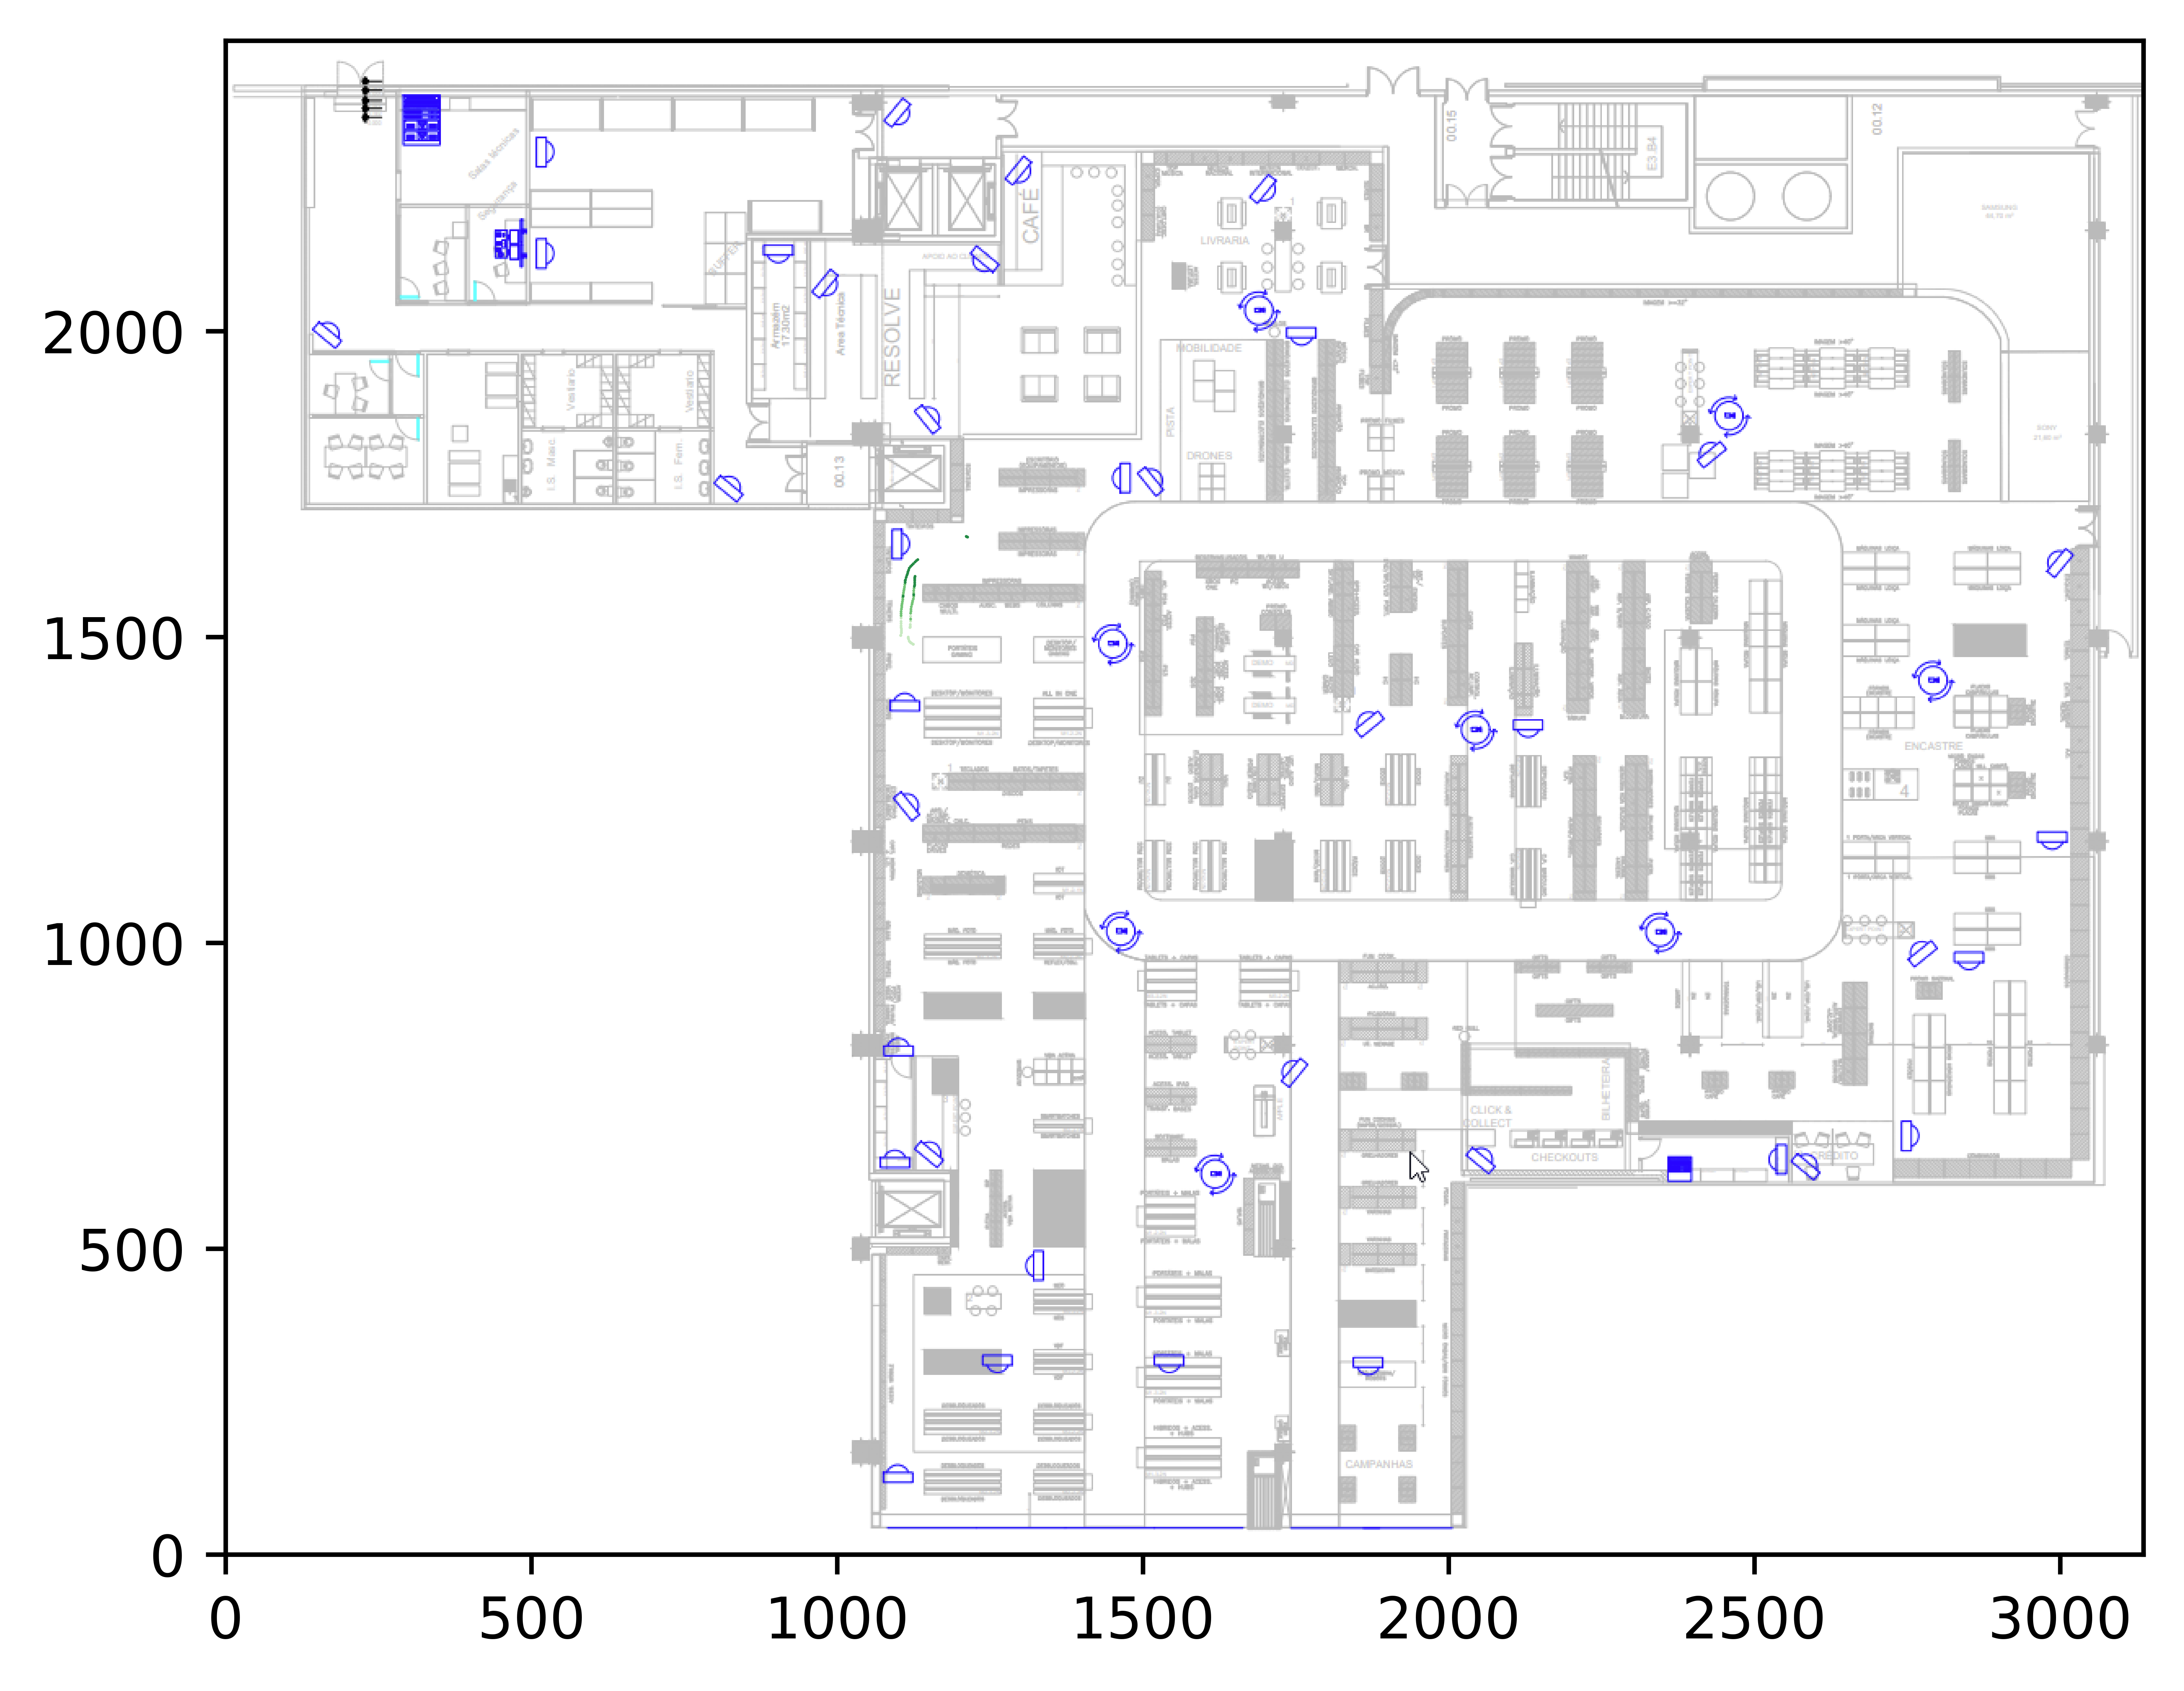

In [95]:
data_by_time = get_data_by_time(df_104, "16:30:28", "16:30:40")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

4
video name: 20220314_1.05_5_5_blurredtime: 16:30:36 bbox coords: (593.7695632211063 649.2308837890624 674.4094406851437 718.9142822265625) camera: 1.05
video name: 20220314_1.05_5_5_blurredtime: 16:30:36 bbox coords: (391.2541691966313 495.3862670898437 684.2844538502437 719.0666870117187) camera: 1.05
video name: 20220314_1.05_5_5_blurredtime: 16:30:36 bbox coords: (368.46373137156434 461.94841323718856 702.1231660221904 719.4456792483961) camera: 1.05
video name: 20220314_1.05_5_5_blurredtime: 16:30:37 bbox coords: (418.1188428625832 501.80375175855033 661.6946661631555 691.1754105475218) camera: 1.05
video name: 20220314_1.05_5_5_blurredtime: 16:30:37 bbox coords: (376.6709702983222 586.19443359375 540.5954847798027 719.83037109375) camera: 1.05
video name: 20220314_1.05_5_5_blurredtime: 16:30:37 bbox coords: (360.01414676784657 550.4031121133695 565.764455495414 719.1403178760349) camera: 1.05
video name: 20220314_1.05_5_5_blurredtime: 16:30:37 bbox coords: (431.68525230331227 47

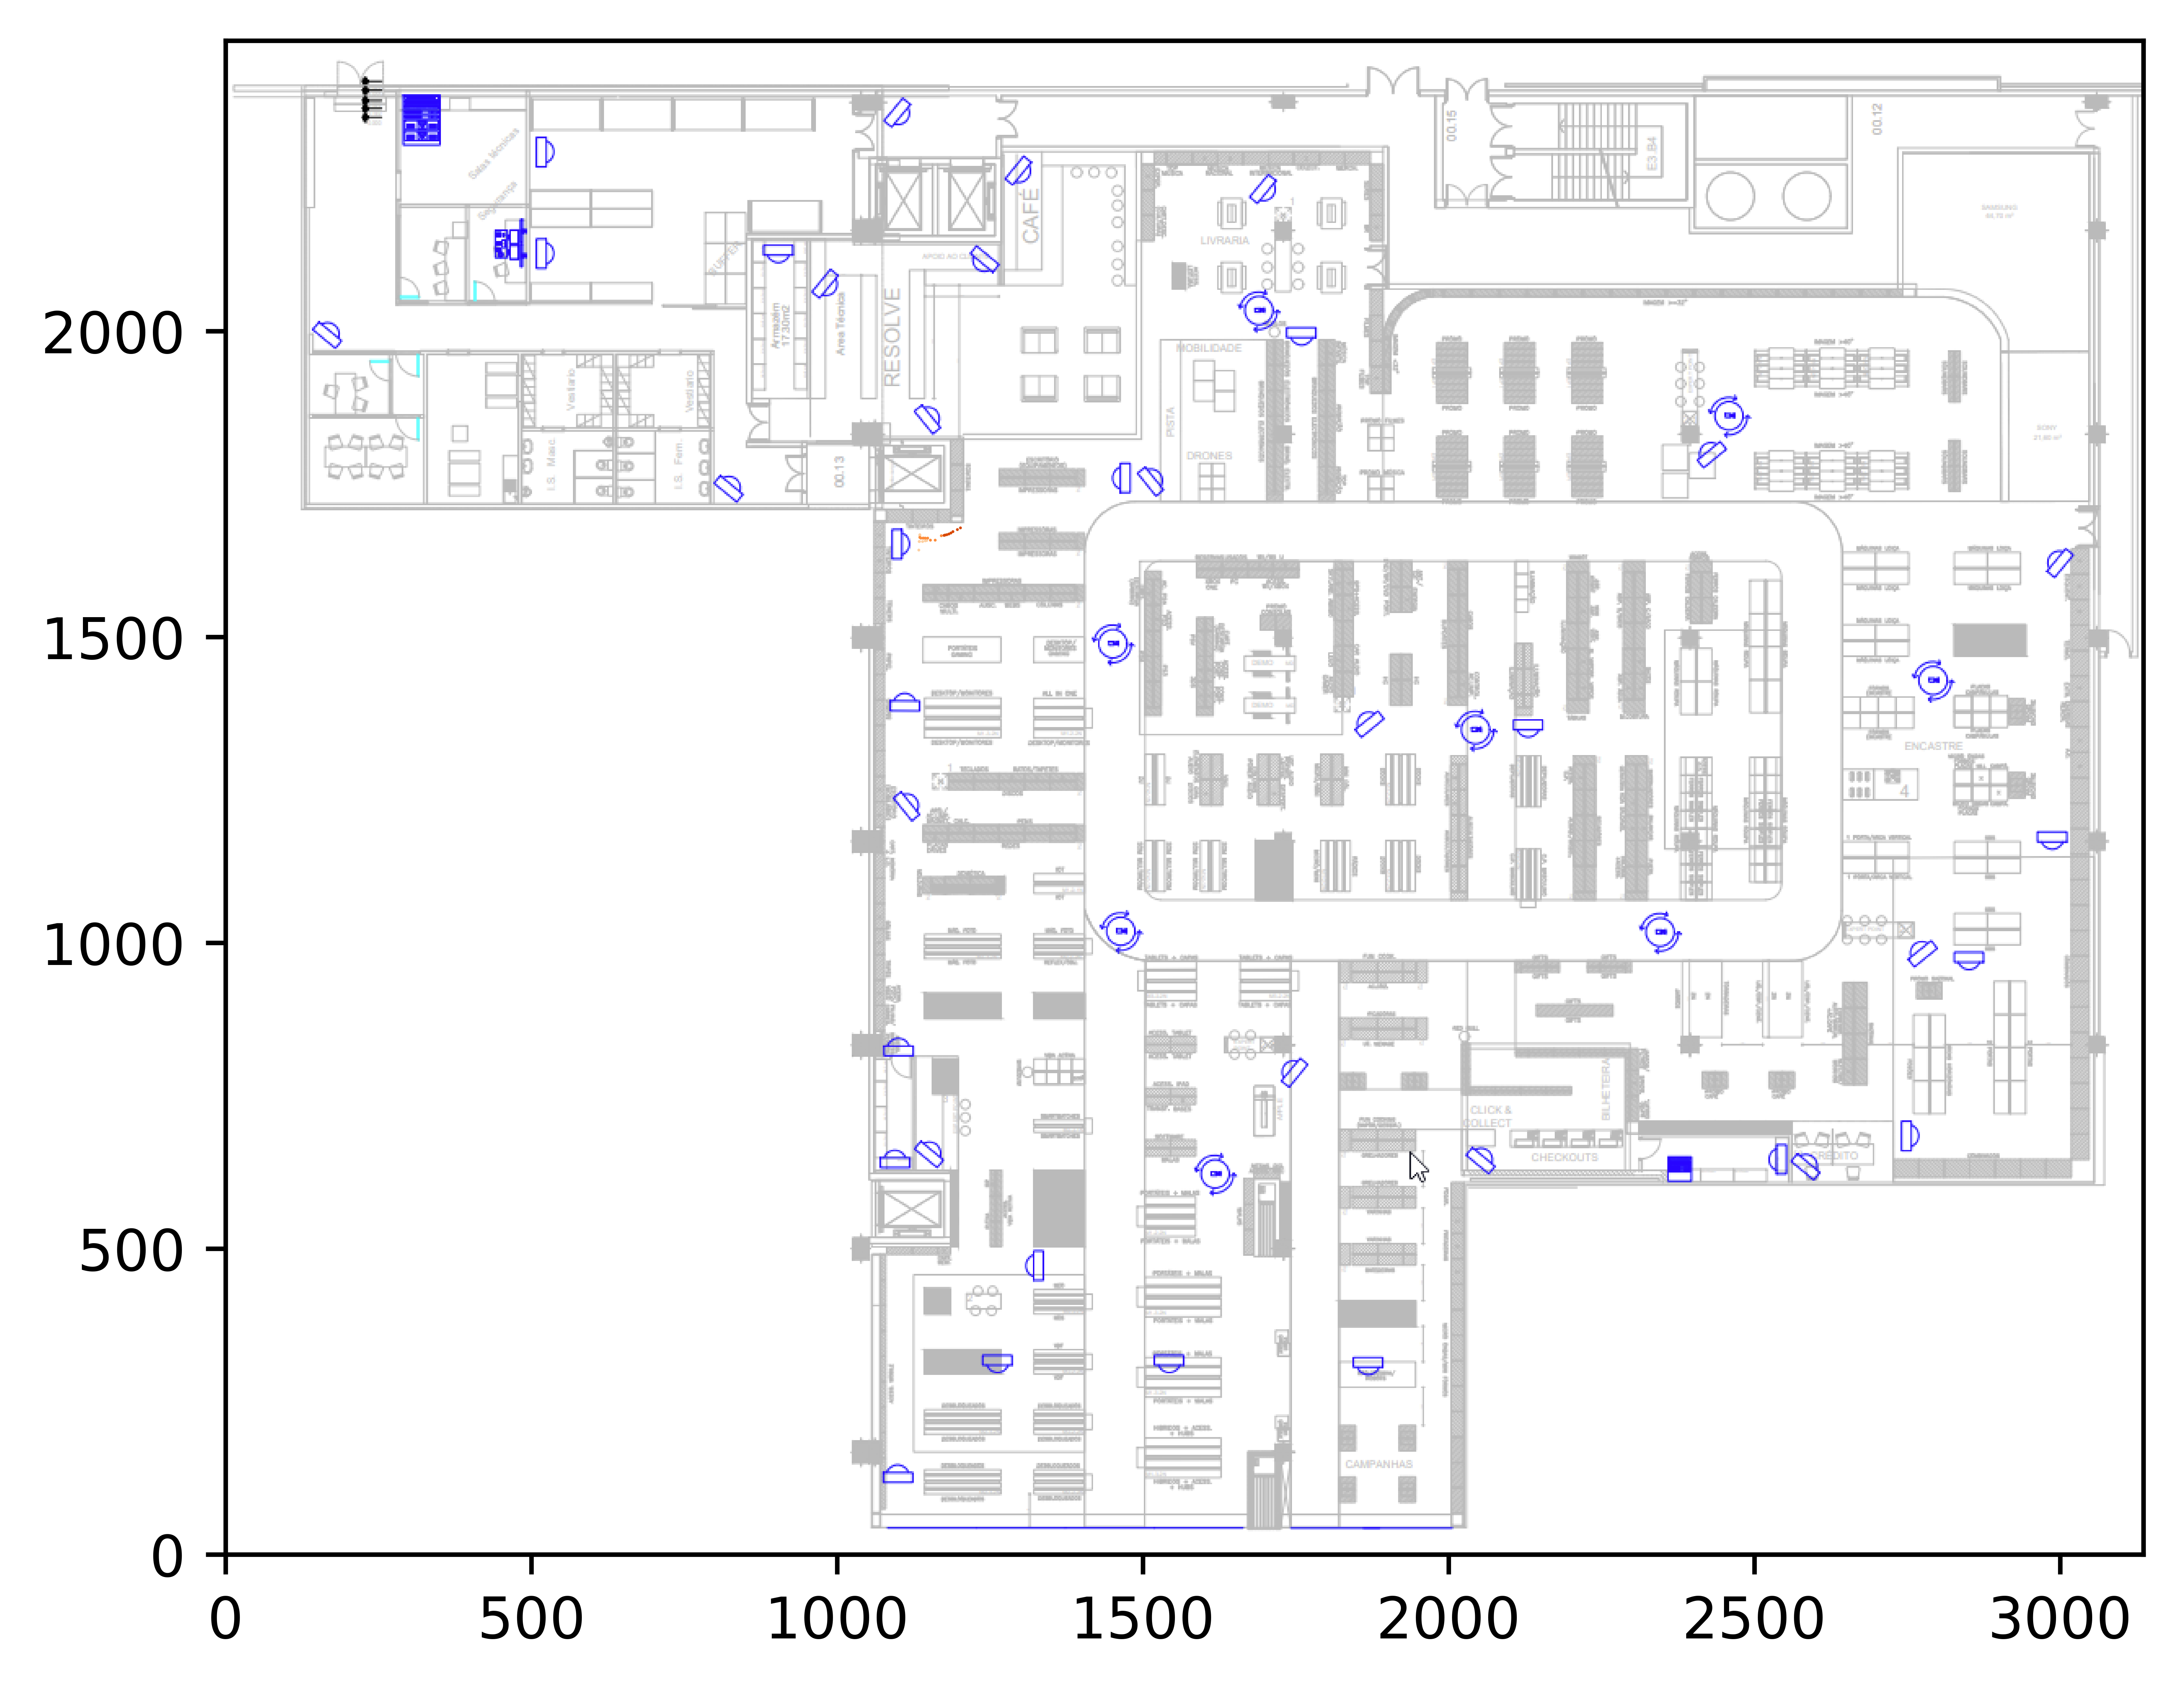

In [96]:
data_by_time = get_data_by_time(df_105, "16:30:27", "16:30:55")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

5
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (913.8777071142092 70.00456833624568 942.1654996205788 147.07815994641487) camera: 1.04
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (927.1509474609692 67.91023319932492 956.4237734820229 147.62059480826883) camera: 1.04
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (932.7908144424556 68.4864549075065 962.1813715489744 147.749261204971) camera: 1.04
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (940.1909210464398 68.66603219944548 968.9414957149232 145.28043089926317) camera: 1.04
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (947.9662438713956 69.76326517780711 974.75083662857 140.97069610689) camera: 1.04
video name: 20220314_1.04_8_5_blurredtime: 22:24:38 bbox coords: (391.92072200796207 57.44824752807618 432.1369195936004 166.8680793762207) camera: 1.04
video name: 20220314_1.04_8_5_blurredtime: 22:24:38 bbox coords: (392.58272081017367 58.

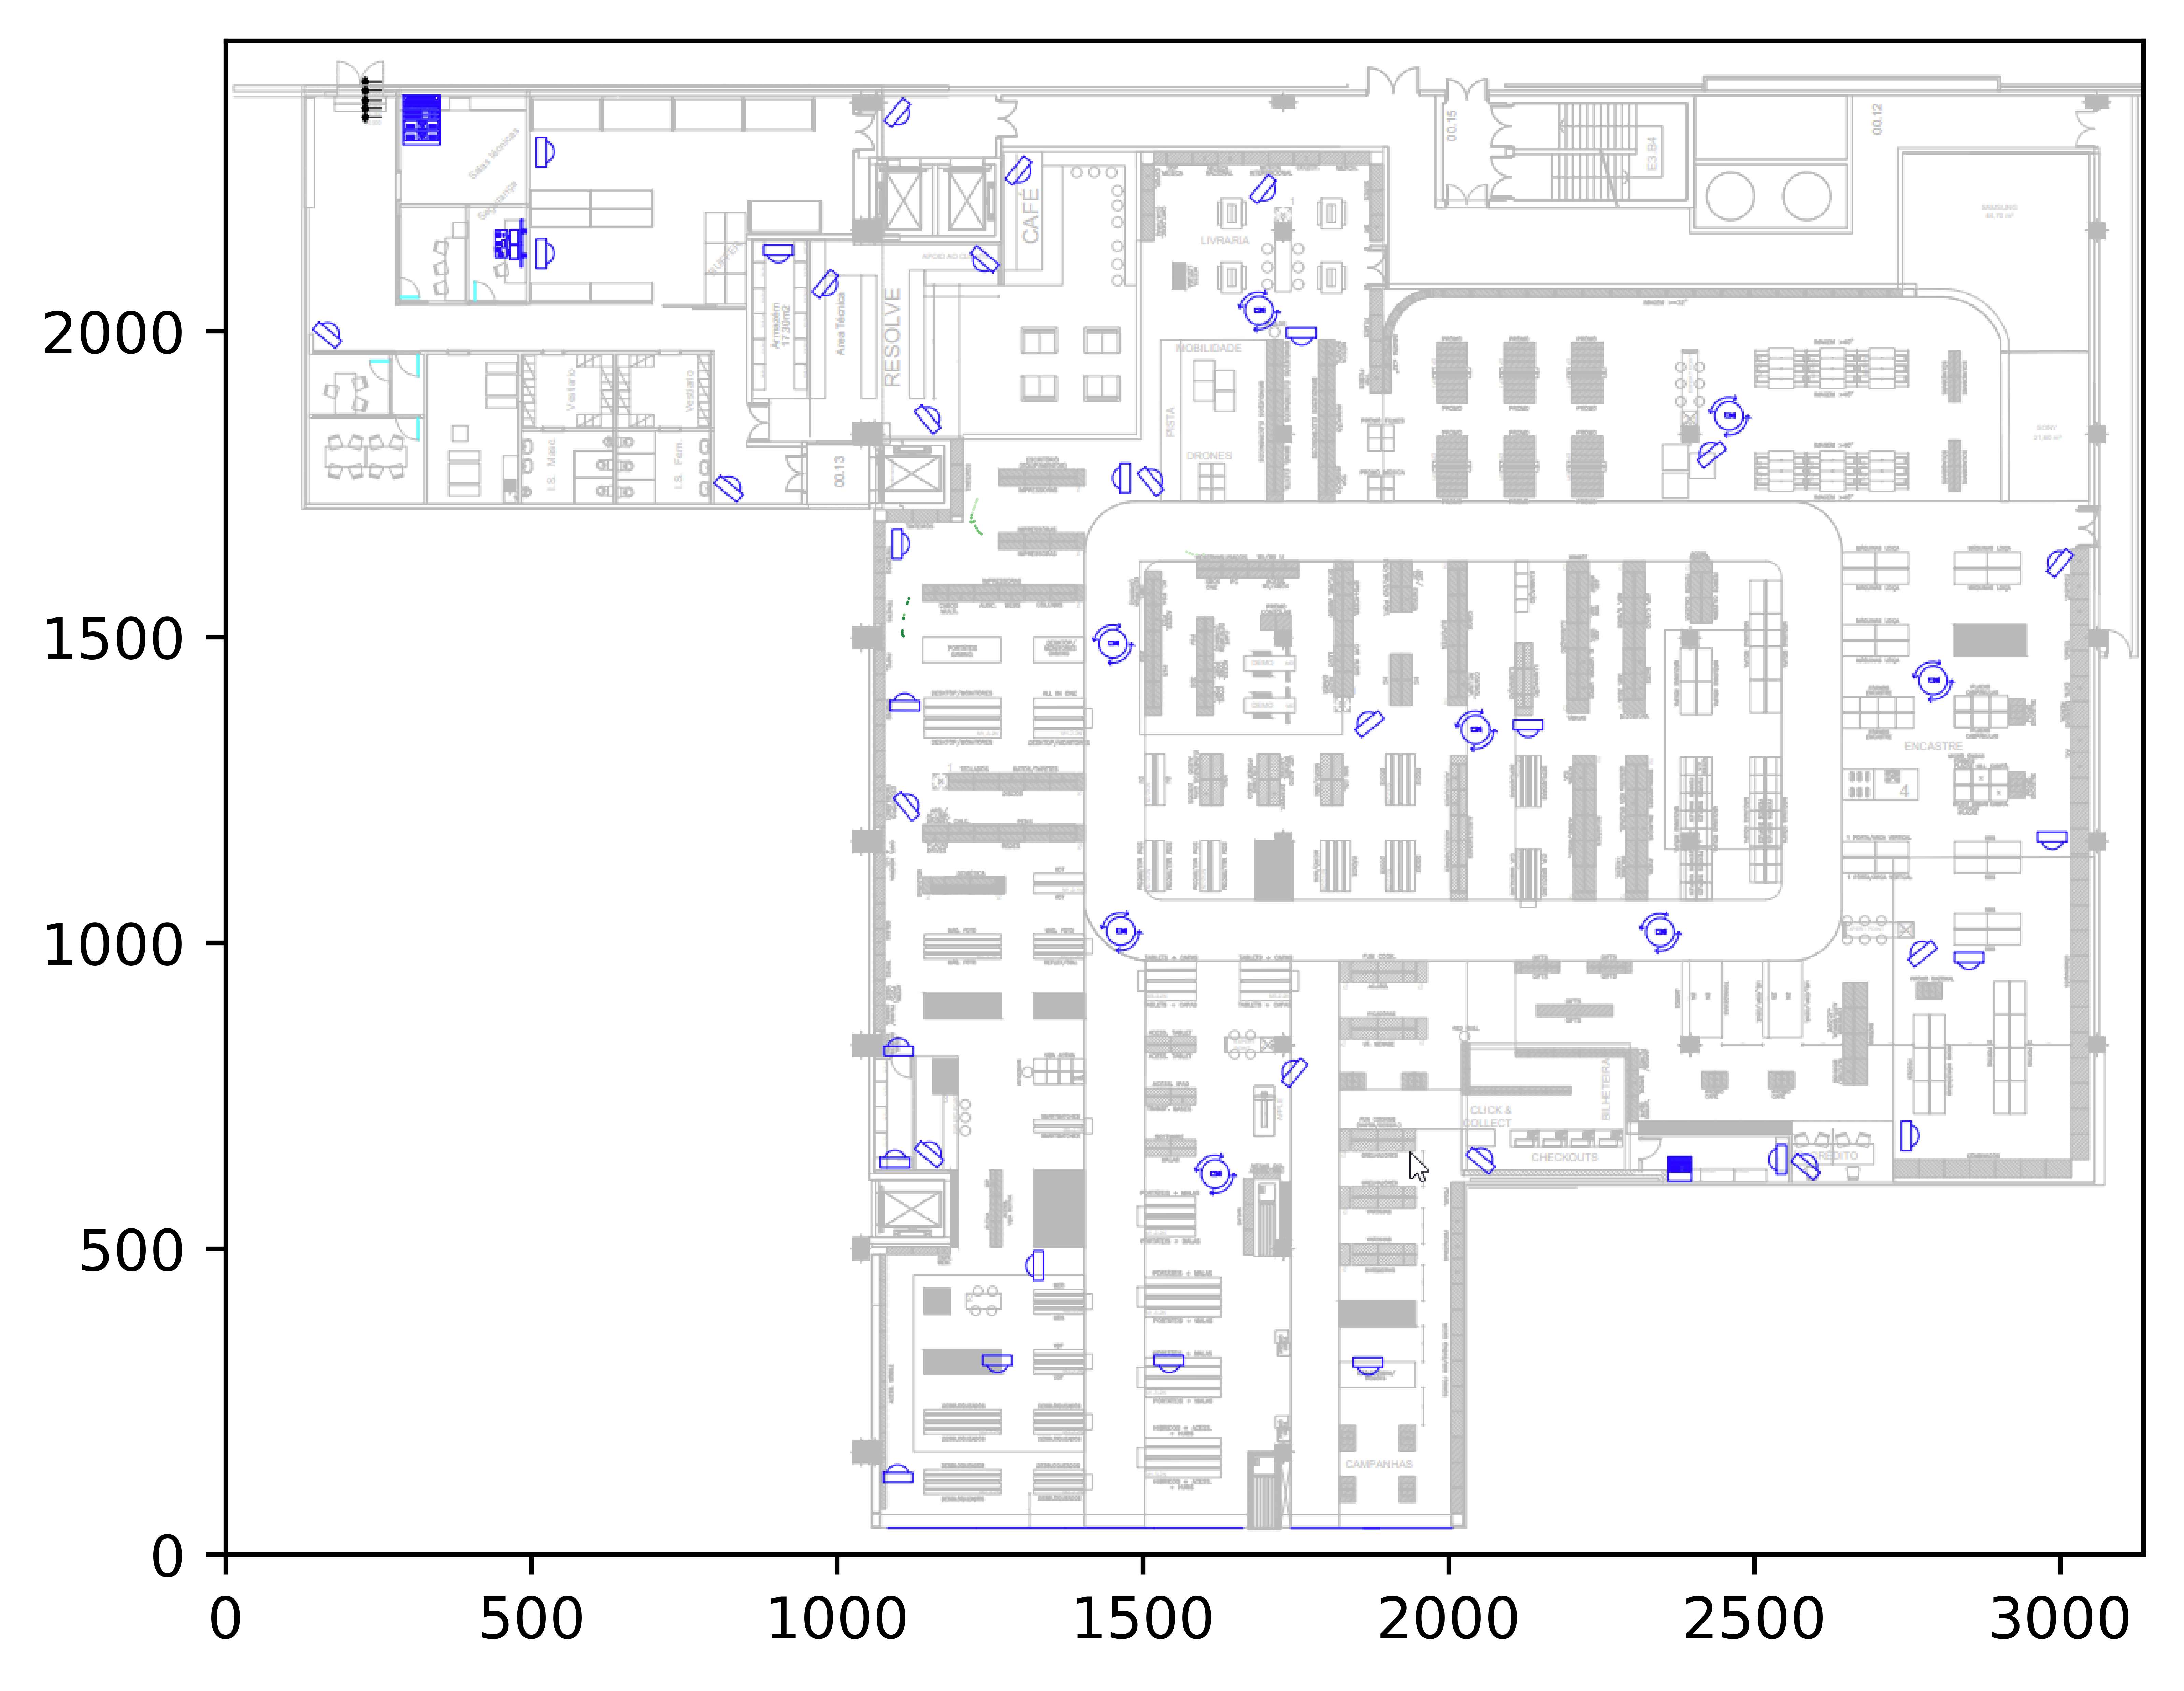

In [109]:
data_by_time = get_data_by_time(df_104, "22:24:35", "22:24:50")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)